In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [6]:
# Load the data
df = pd.read_csv('pokemon.csv')

# Display basic information about the dataset
# print(df.info())

# Show the first few rows
print(df.head())

# Basic statistics of numerical columns
# print(df.describe())

# Check for missing values
# print(df.isnull().sum())


   Number        Name          Type  Total  HP  Attack  Defense  Sp. Atk  \
0       1   Bulbasaur  Grass Poison    318  45      49       49       65   
1       2     Ivysaur  Grass Poison    405  60      62       63       80   
2       3    Venusaur  Grass Poison    525  80      82       83      100   
3       4  Charmander          Fire    309  39      52       43       60   
4       5  Charmeleon          Fire    405  58      64       58       80   

   Sp. Def  Speed  Generation  \
0       65     45         1.0   
1       80     60         1.0   
2      100     80         1.0   
3       50     65         1.0   
4       65     80         1.0   

                                           Image URL Height Weight  
0  https://img.pokemondb.net/sprites/home/normal/...    0.7    6.9  
1  https://img.pokemondb.net/sprites/home/normal/...    1.0   13.0  
2  https://img.pokemondb.net/sprites/home/normal/...    2.0  100.0  
3  https://img.pokemondb.net/sprites/home/normal/...    0.6    8.5  

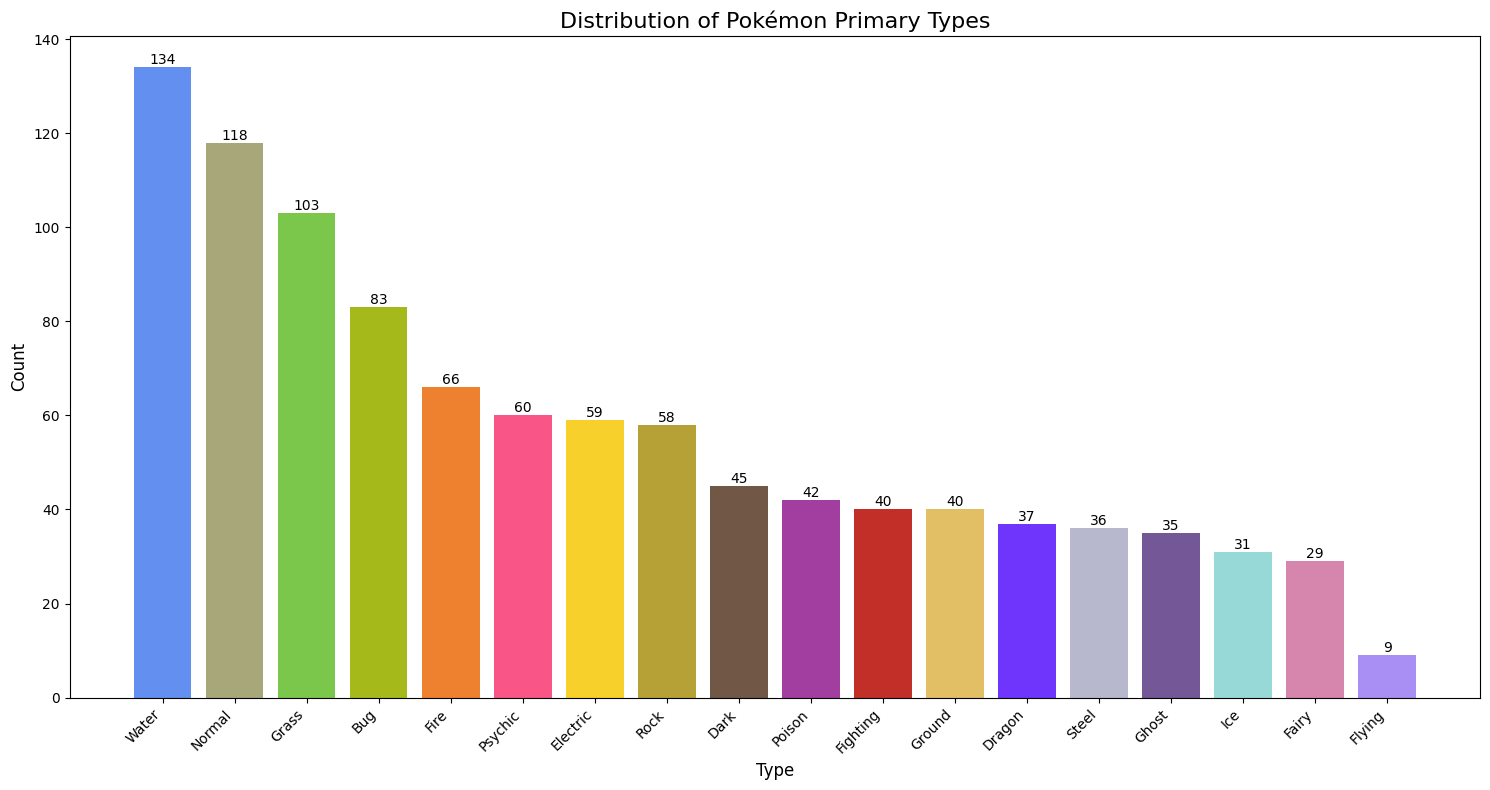

In [13]:
# Distribution of Types
# Extract primary type if not already done
df['Primary_Type'] = df['Type'].str.split().str[0]

# Define colors for each type
type_colors = {
    'Normal': '#A8A77A', 'Fire': '#EE8130', 'Water': '#6390F0',
    'Electric': '#F7D02C', 'Grass': '#7AC74C', 'Ice': '#96D9D6',
    'Fighting': '#C22E28', 'Poison': '#A33EA1', 'Ground': '#E2BF65',
    'Flying': '#A98FF3', 'Psychic': '#F95587', 'Bug': '#A6B91A',
    'Rock': '#B6A136', 'Ghost': '#735797', 'Dragon': '#6F35FC',
    'Dark': '#705746', 'Steel': '#B7B7CE', 'Fairy': '#D685AD'
}

# Count the primary types
type_counts = df['Primary_Type'].value_counts()

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(type_counts.index, type_counts.values, color=[type_colors.get(t, '#000000') for t in type_counts.index])

# Customize the plot
plt.title('Distribution of Pokémon Primary Types', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Show the plot
plt.show()

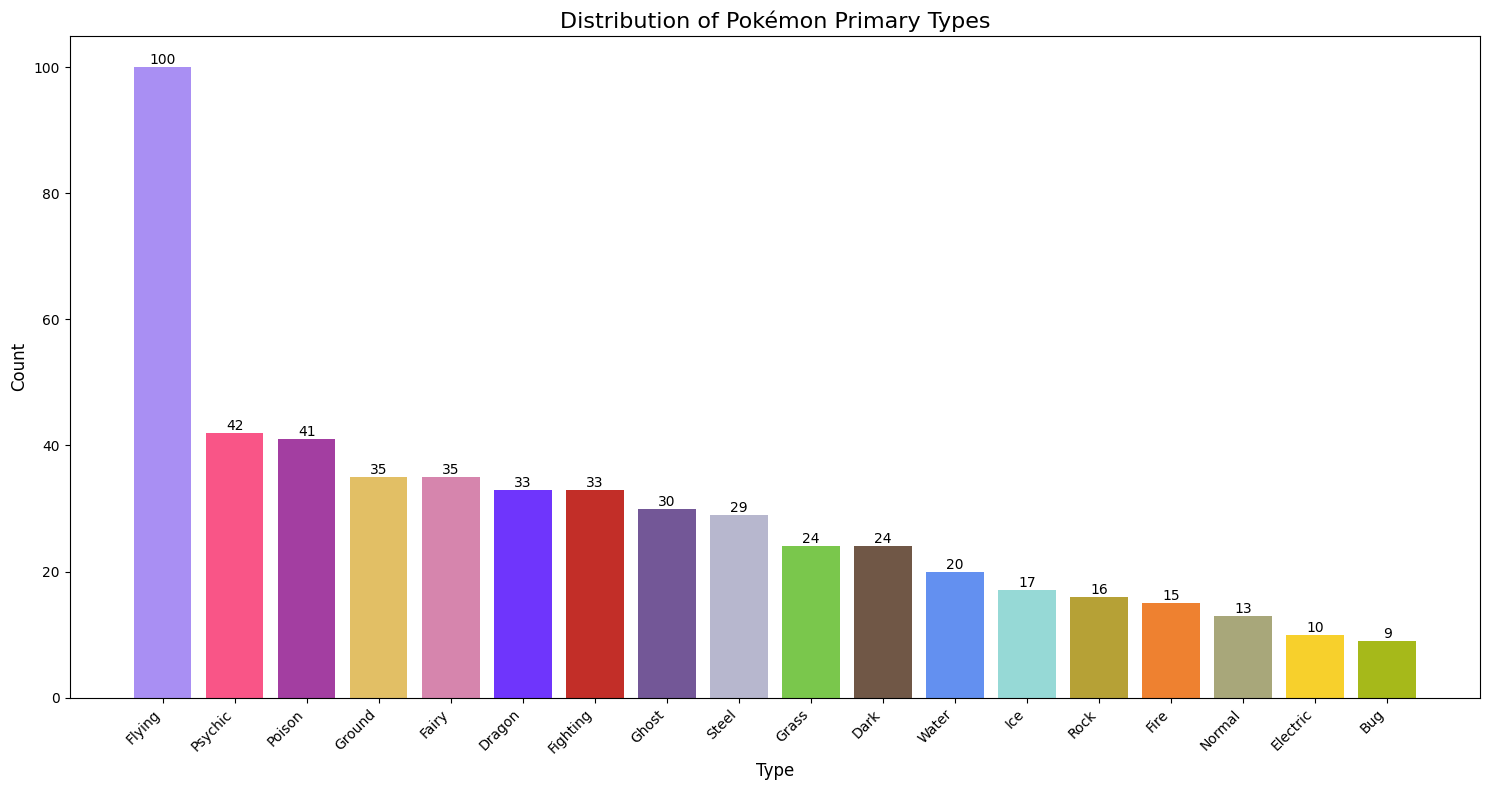

In [14]:
# Distribution of Secondary Types
# Extract secondary type if not already done
df['Secondary_Type'] = df['Type'].str.split().str[1]

# Define colors for each type
type_colors = {
    'Normal': '#A8A77A', 'Fire': '#EE8130', 'Water': '#6390F0',
    'Electric': '#F7D02C', 'Grass': '#7AC74C', 'Ice': '#96D9D6',
    'Fighting': '#C22E28', 'Poison': '#A33EA1', 'Ground': '#E2BF65',
    'Flying': '#A98FF3', 'Psychic': '#F95587', 'Bug': '#A6B91A',
    'Rock': '#B6A136', 'Ghost': '#735797', 'Dragon': '#6F35FC',
    'Dark': '#705746', 'Steel': '#B7B7CE', 'Fairy': '#D685AD'
}

# Count the primary types
type_counts = df['Secondary_Type'].value_counts()

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(type_counts.index, type_counts.values, color=[type_colors.get(t, '#000000') for t in type_counts.index])

# Customize the plot
plt.title('Distribution of Pokémon Secondary Types', fontsize=16)
plt.xlabel('Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom')

# Show the plot
plt.show()

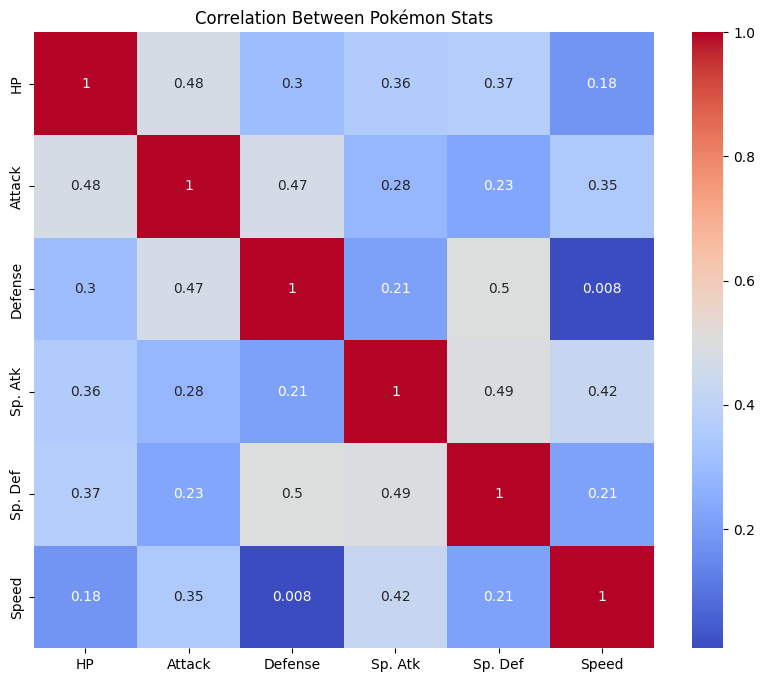

In [8]:
# Correlation between stats
correlation_matrix = df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Between Pokémon Stats')
plt.show()

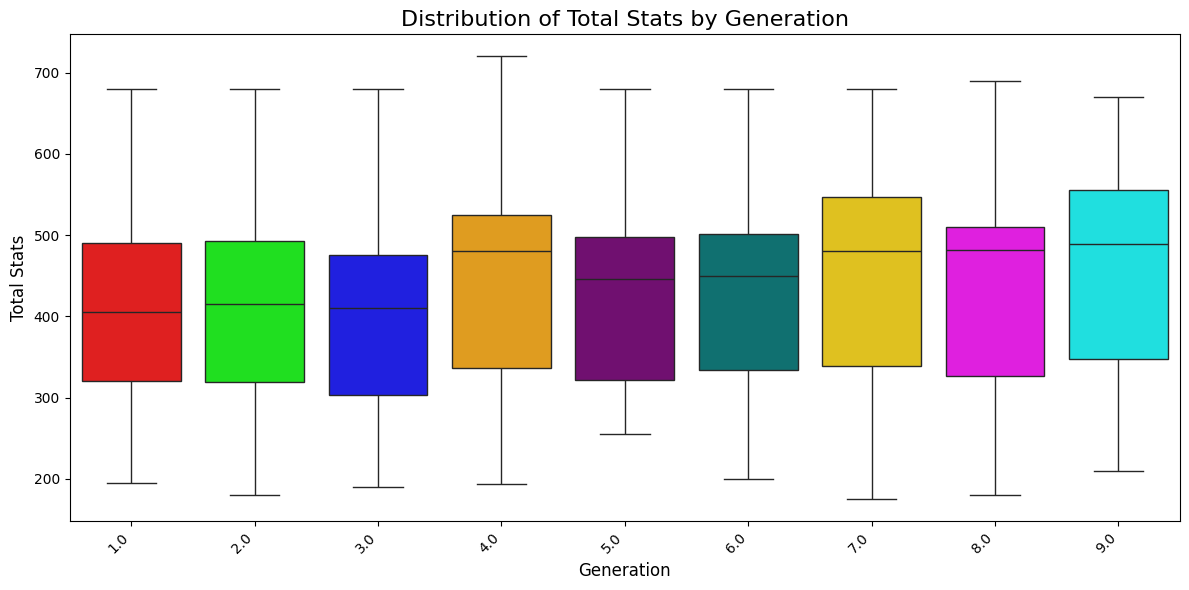

In [16]:
# Define a custom color palette with more distinct colors
custom_palette = ['#FF0000', '#00FF00', '#0000FF', '#FFA500', '#800080', '#008080', '#FFD700', '#FF00FF', '#00FFFF']

# Create the box plot with custom colors
plt.figure(figsize=(12, 6))
sns.boxplot(x='Generation', y='Total', hue='Generation', data=df, palette=custom_palette, legend=False)

plt.title('Distribution of Total Stats by Generation', fontsize=16)
plt.xlabel('Generation', fontsize=12)
plt.ylabel('Total Stats', fontsize=12)

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

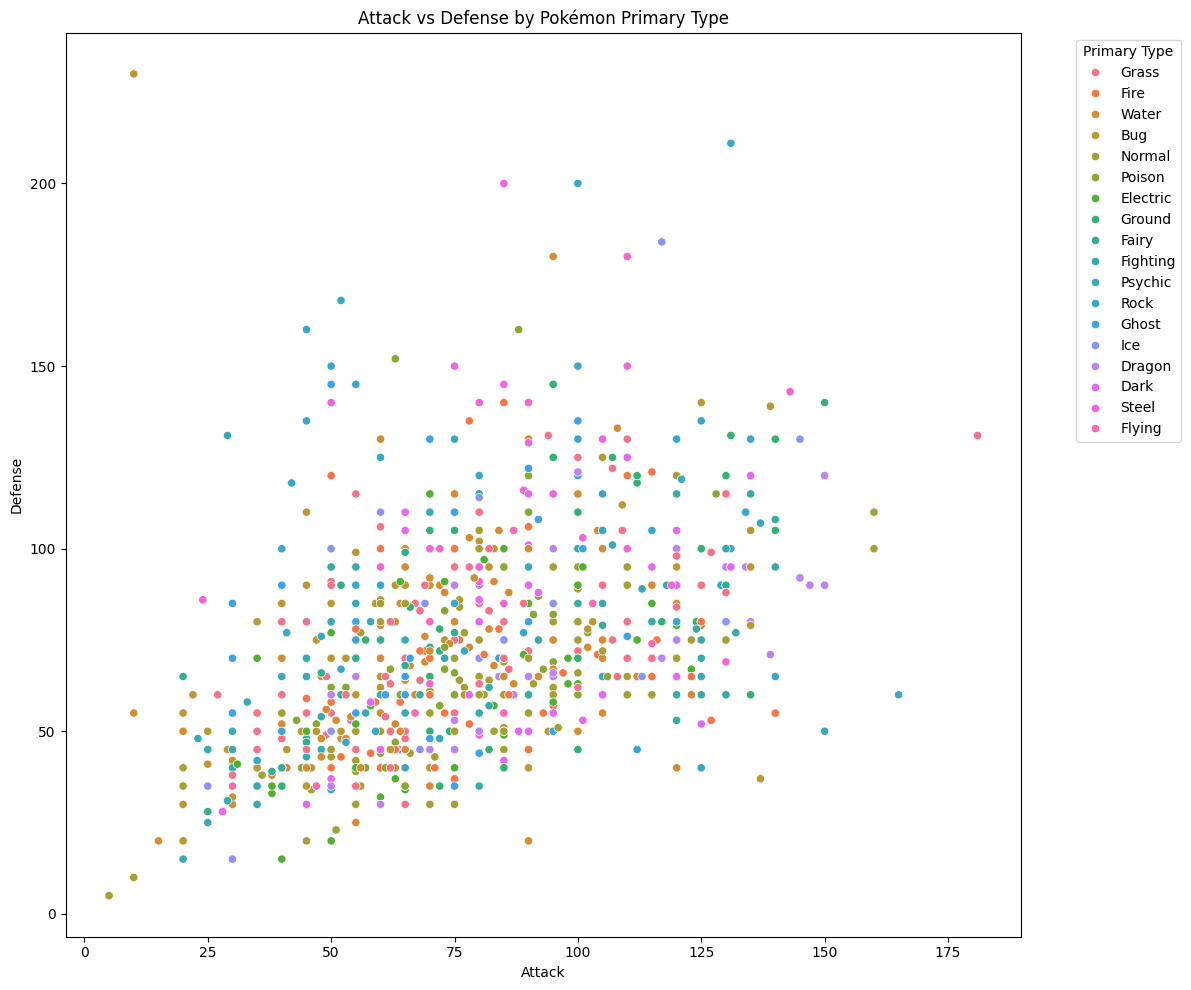

In [12]:
# Extract the primary type (first type listed) for each Pokémon
df['Primary_Type'] = df['Type'].str.split().str[0]

# Scatter plot of Attack vs Defense using primary types
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Attack', y='Defense', hue='Primary_Type', data=df)
plt.title('Attack vs Defense by Pokémon Primary Type')
plt.legend(title='Primary Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

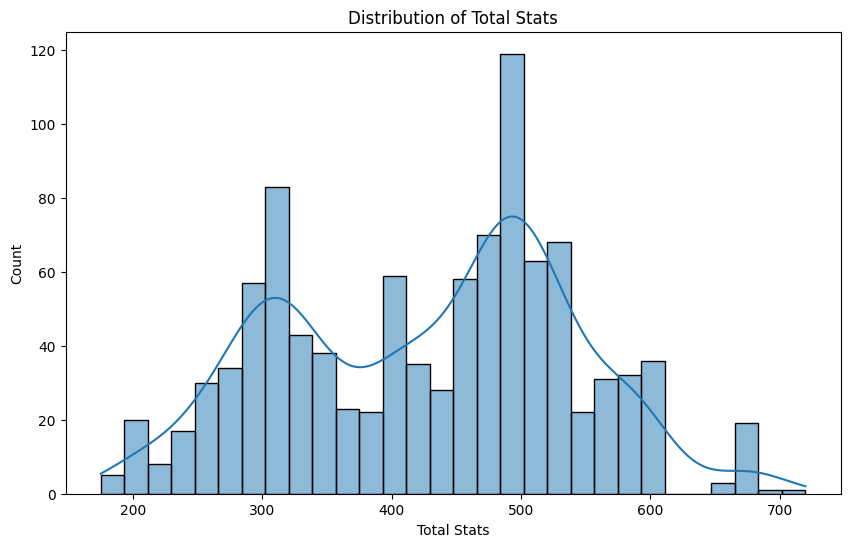

In [11]:
# Histogram of total stats
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True)
plt.title('Distribution of Total Stats')
plt.xlabel('Total Stats')
plt.show()

In [2]:
# editing the csv file to split types
import pandas as pd

# Read the existing CSV file
df = pd.read_csv('pokemon.csv')

# Split the 'Type' column
df[['Primary_Type', 'Secondary_Type']] = df['Type'].str.split(expand=True)

# Fill NaN values in Secondary_Type with 'None'
df['Secondary_Type'] = df['Secondary_Type'].fillna('None')

# Optional: Remove the original 'Type' column
df = df.drop('Type', axis=1)

# Reorder columns (adjust this list as needed)
column_order = ['Name', 'Primary_Type', 'Secondary_Type', 'Generation', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Total', 'Height(m)', 'Weight(kg)', 'Image URL']
df = df[column_order]

# Save to a new CSV file
df.to_csv('pokemon_data_updated.csv', index=False)




In [10]:
# stratified split
import pandas as pd
from sklearn.model_selection import train_test_split
from tabulate import tabulate

# Load your Pokémon data
df = pd.read_csv('pokemon.csv')

# Stratify based on Primary Type
train_val, test = train_test_split(df, test_size=0.15, stratify=df['Primary_Type'], random_state=42)
train, val = train_test_split(train_val, test_size=0.1765, stratify=train_val['Primary_Type'], random_state=42)

# Reset indices
train = train.reset_index(drop=True)
val = val.reset_index(drop=True)
test = test.reset_index(drop=True)

# Save the splits to separate CSV files
train.to_csv('pokemon_train.csv', index=False)
val.to_csv('pokemon_validation.csv', index=False)
test.to_csv('pokemon_test.csv', index=False)

# Create the sample size table
sample_sizes = [
    ["Total", len(df), "100.00%"],
    ["Training", len(train), f"{len(train)/len(df):.2%}"],
    ["Validation", len(val), f"{len(val)/len(df):.2%}"],
    ["Test", len(test), f"{len(test)/len(df):.2%}"]
]

print(tabulate(sample_sizes, headers=["Dataset", "Samples", "Percentage"], tablefmt="pipe"))

# Function to create distribution table
def create_distribution_table(feature):
    orig_dist = df[feature].value_counts(normalize=True)
    train_dist = train[feature].value_counts(normalize=True)
    val_dist = val[feature].value_counts(normalize=True)
    test_dist = test[feature].value_counts(normalize=True)
    
    table_data = []
    for type in orig_dist.index:
        row = [
            type,
            f"{orig_dist.get(type, 0):.2%}",
            f"{train_dist.get(type, 0):.2%}",
            f"{val_dist.get(type, 0):.2%}",
            f"{test_dist.get(type, 0):.2%}"
        ]
        table_data.append(row)
    
    print(f"\n{feature} Distribution:")
    print(tabulate(table_data, headers=[feature, "Original", "Training", "Validation", "Test"], tablefmt="pipe"))

# Create distribution tables
create_distribution_table('Primary_Type')
create_distribution_table('Secondary_Type')
create_distribution_table('Generation')

# Create maximum difference table
features = ['Primary_Type', 'Secondary_Type', 'Generation']
max_diff_data = []

for feature in features:
    orig_dist = df[feature].value_counts(normalize=True)
    train_diff = max(abs(orig_dist - train[feature].value_counts(normalize=True)))
    val_diff = max(abs(orig_dist - val[feature].value_counts(normalize=True)))
    test_diff = max(abs(orig_dist - test[feature].value_counts(normalize=True)))
    
    max_diff_data.append([feature, f"{train_diff:.2%}", f"{val_diff:.2%}", f"{test_diff:.2%}"])

print("\nMaximum Distribution Difference:")
print(tabulate(max_diff_data, headers=["Feature", "Train", "Validation", "Test"], tablefmt="pipe"))


| Dataset    |   Samples | Percentage   |
|:-----------|----------:|:-------------|
| Total      |      1025 | 100.00%      |
| Training   |       717 | 69.95%       |
| Validation |       154 | 15.02%       |
| Test       |       154 | 15.02%       |

Primary_Type Distribution:
| Primary_Type   | Original   | Training   | Validation   | Test   |
|:---------------|:-----------|:-----------|:-------------|:-------|
| Water          | 13.07%     | 13.11%     | 12.99%       | 12.99% |
| Normal         | 11.51%     | 11.44%     | 11.69%       | 11.69% |
| Grass          | 10.05%     | 10.04%     | 9.74%        | 10.39% |
| Bug            | 8.10%      | 8.09%      | 8.44%        | 7.79%  |
| Fire           | 6.44%      | 6.42%      | 6.49%        | 6.49%  |
| Psychic        | 5.85%      | 5.86%      | 5.84%        | 5.84%  |
| Electric       | 5.76%      | 5.72%      | 5.84%        | 5.84%  |
| Rock           | 5.66%      | 5.58%      | 5.84%        | 5.84%  |
| Dark           | 4.39%      

In [6]:
import pandas as pd

df = pd.read_csv('pokemon.csv')
print(df.isna().sum())

Name                0
Primary_Type        0
Secondary_Type    499
Generation          0
HP                  0
Attack              0
Defense             0
Sp. Atk             0
Sp. Def             0
Speed               0
Total               0
Height(m)           0
Weight(kg)          0
Image URL           0
dtype: int64


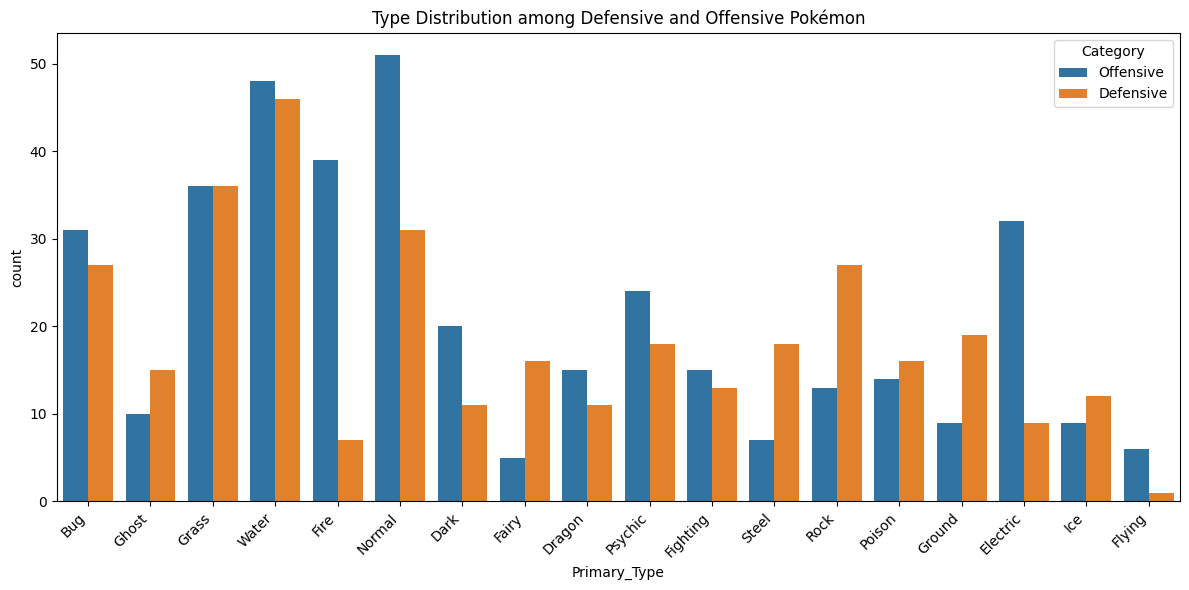

Primary_Type  Bug  Dark  Dragon  Electric  Fairy  Fighting  Fire  Flying  \
Category                                                                   
Defensive      27    11      11         9     16        13     7       1   
Offensive      31    20      15        32      5        15    39       6   

Primary_Type  Ghost  Grass  Ground  Ice  Normal  Poison  Psychic  Rock  Steel  \
Category                                                                        
Defensive        15     36      19   12      31      16       18    27     18   
Offensive        10     36       9    9      51      14       24    13      7   

Primary_Type  Water  
Category             
Defensive        46  
Offensive        48  


In [17]:
# offensive versus defensive pokemon type distribution
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('pokemon_train.csv')

# Calculate defensive and offensive scores
df['Defensive_Score'] = df['HP'] + df['Defense'] + df['Sp. Def']
df['Offensive_Score'] = df['Attack'] + df['Sp. Atk'] + df['Speed']

# Categorize Pokémon
df['Category'] = df.apply(lambda row: 'Defensive' if row['Defensive_Score'] > row['Offensive_Score'] else 'Offensive', axis=1)

# Analyze type distributions
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Primary_Type', hue='Category')
plt.title('Type Distribution among Defensive and Offensive Pokémon')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Category')
plt.tight_layout()
plt.show()

# Print summary statistics
print(df.groupby('Category')['Primary_Type'].value_counts().unstack(fill_value=0))

In [25]:
import requests
import os
from PIL import Image
from io import BytesIO

def download_and_save_image(row, base_dir='pokemon_validation_images'):
    name = row['Name']
    url = row['Image URL']
    gen = row['Generation']
    
    dir_path = os.path.join(base_dir, f'gen_{gen}')
    os.makedirs(dir_path, exist_ok=True)
    
    try:
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        save_path = os.path.join(dir_path, f'{name}.png')
        img.save(save_path)
        print(f"Saved: {name}")
    except Exception as e:
        print(f"Error saving {name}: {str(e)}")

# Load the Pokemon data
df = pd.read_csv('pokemon_validation.csv')

# Apply to your DataFrame
df.apply(download_and_save_image, axis=1)

Saved: Qwilfish
Saved: Manaphy
Saved: Swinub
Saved: Basculin
Saved: Archaludon
Saved: Phantump
Saved: Drakloak
Saved: Luvdisc
Saved: Applin
Saved: Dragapult
Saved: Lanturn
Saved: Pecharunt
Saved: Duosion
Saved: Mothim
Saved: Dracovish
Saved: Wartortle
Saved: Spinarak
Saved: Cleffa
Saved: Snorunt
Saved: Pangoro
Saved: Purrloin
Saved: Araquanid
Saved: Makuhita
Saved: Wiglett
Saved: Arbok
Saved: Flutter Mane
Saved: Linoone
Saved: Servine
Saved: Carkol
Saved: Ledyba
Saved: Riolu
Saved: Crabrawler
Saved: Illumise
Saved: Pawniard
Saved: Solgaleo
Saved: Armarouge
Saved: Bonsly
Saved: Yveltal
Saved: Frigibax
Saved: Pyroar
Saved: Bunnelby
Saved: Tropius
Saved: Charjabug
Saved: Coalossal
Saved: Petilil
Saved: Iron Bundle
Saved: Purugly
Saved: Sandslash
Saved: Blastoise
Saved: Mawile
Saved: Hoppip
Saved: Seedot
Saved: Charizard
Saved: Teddiursa
Saved: Tornadus
Saved: Absol
Saved: Revavroom
Saved: Iron Hands
Saved: Kabutops
Saved: Anorith
Saved: Tauros
Saved: Crustle
Saved: Lilligant
Saved: Arctoz

0      None
1      None
2      None
3      None
4      None
       ... 
149    None
150    None
151    None
152    None
153    None
Length: 154, dtype: object

Loading images...


/Users/marvinchen/Desktop/IW/cos-independent-work/cos397/lib/python3.11/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


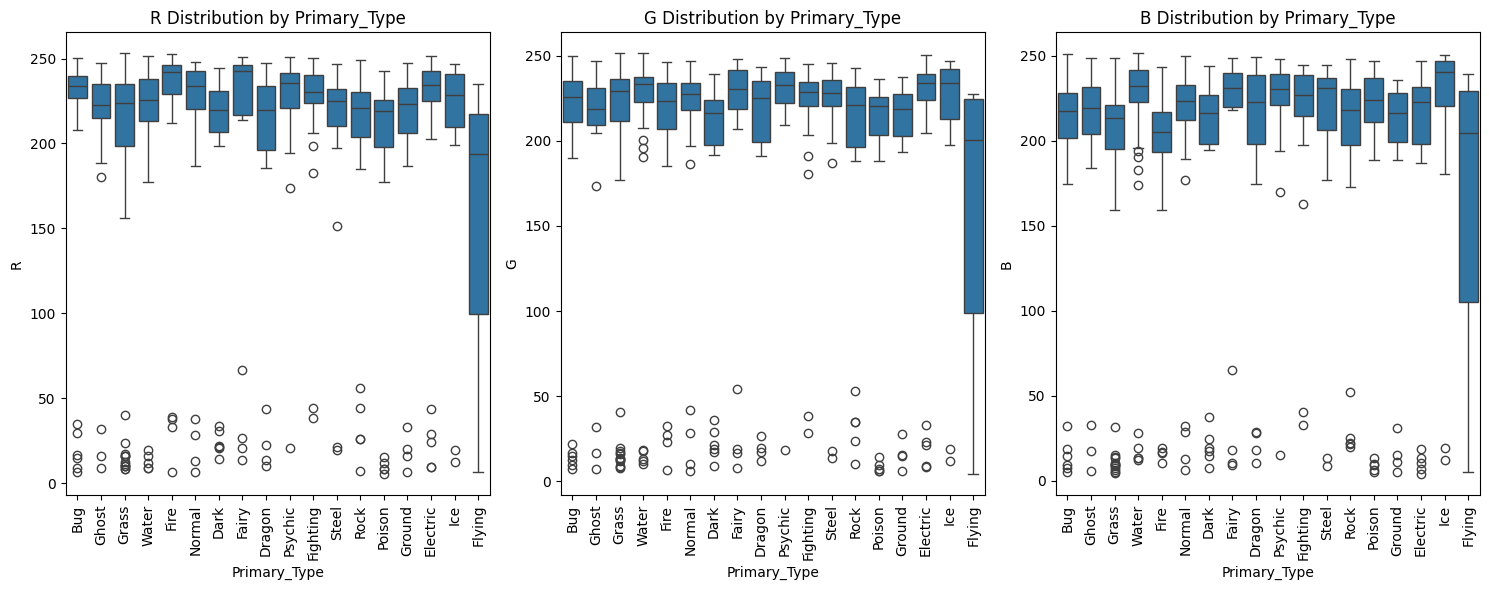

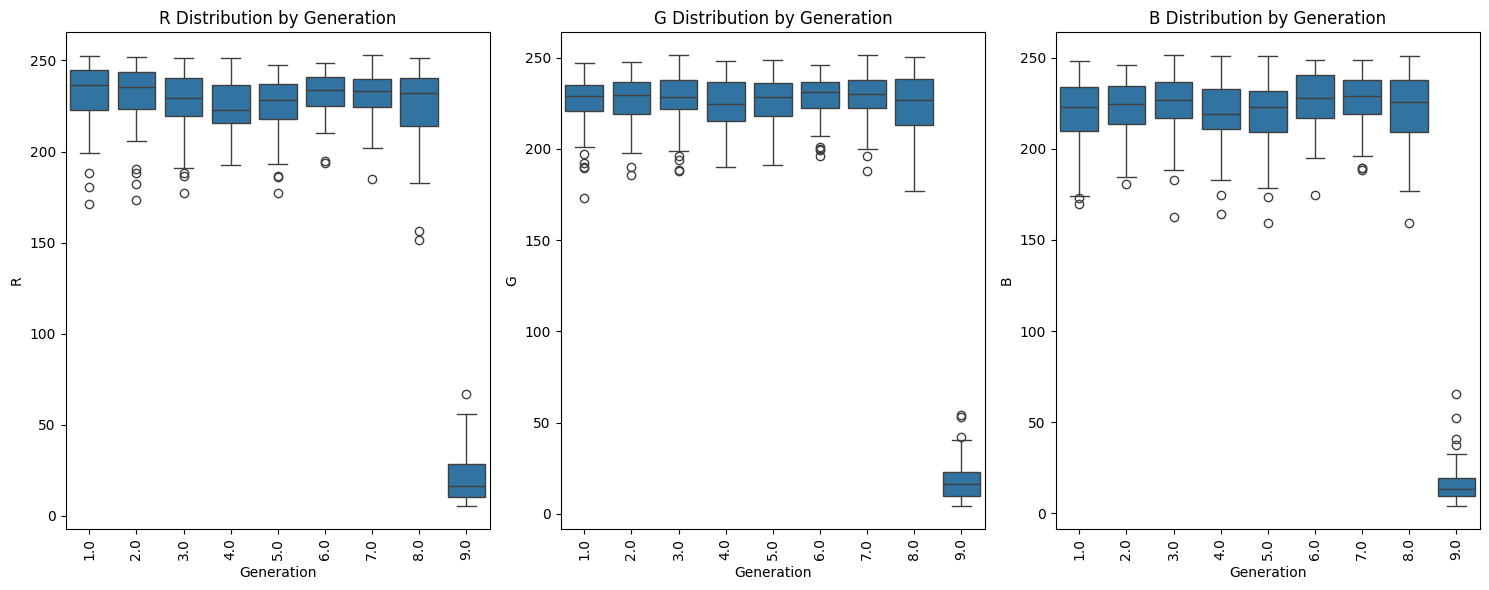

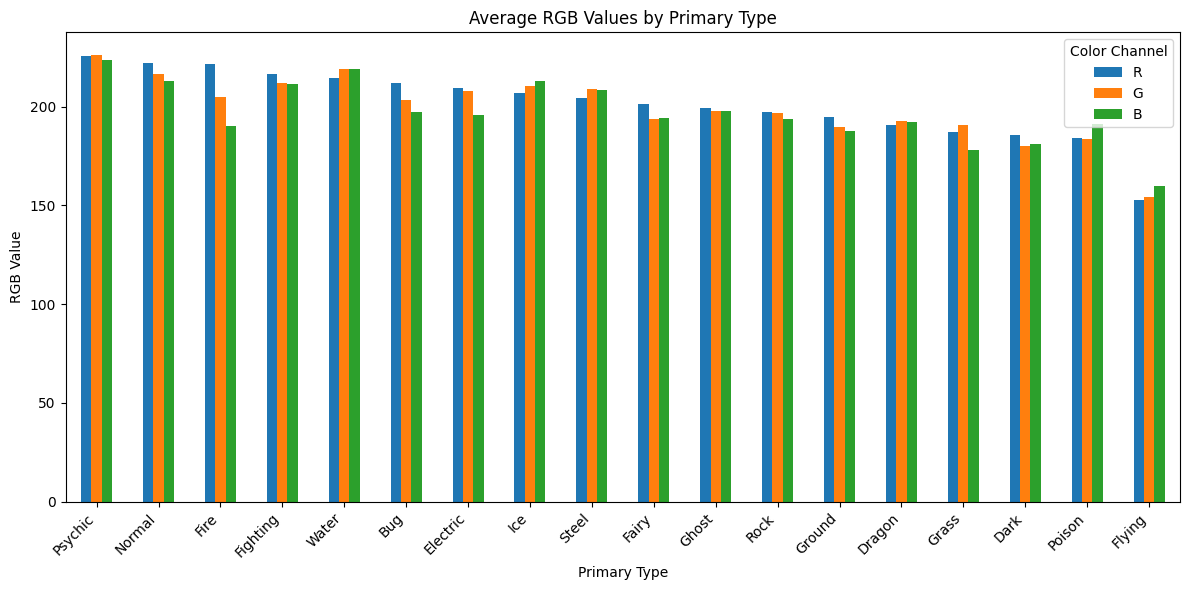

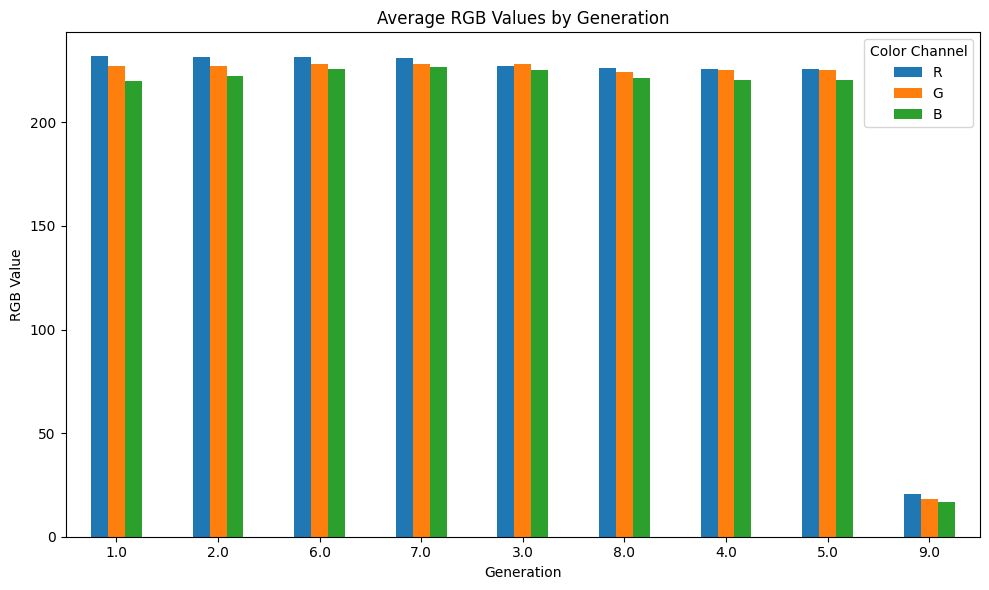

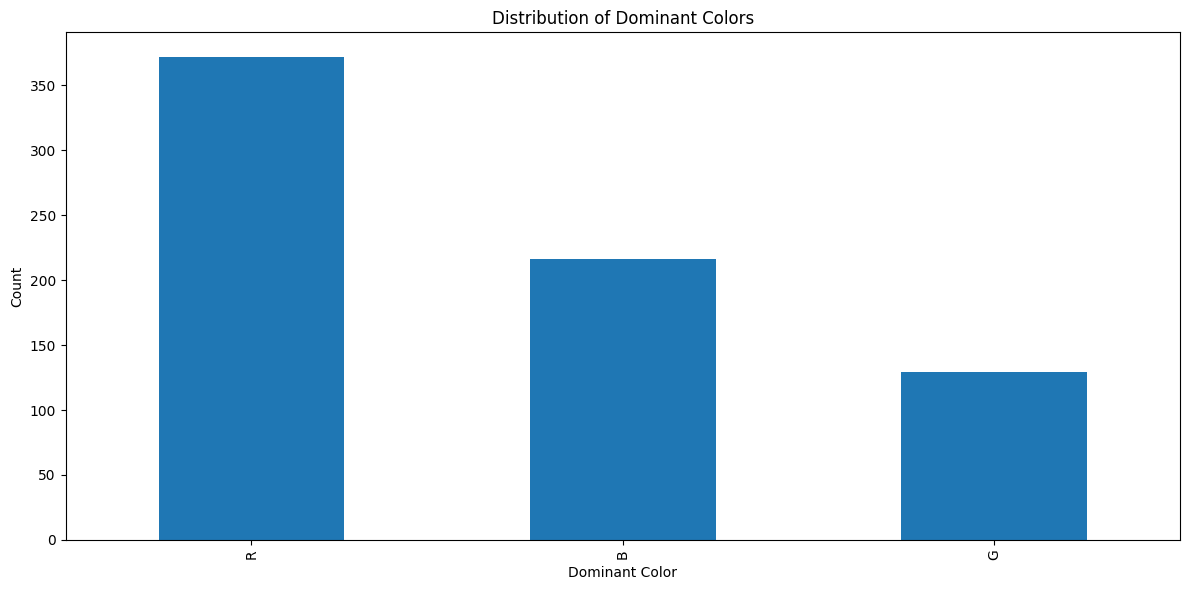

<Figure size 1200x800 with 0 Axes>

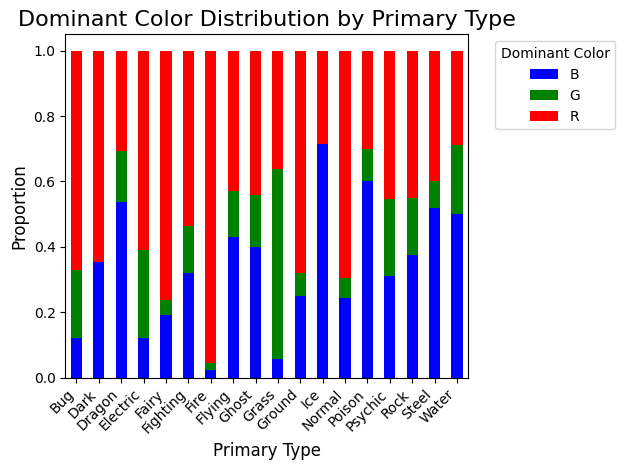

Analysis complete.


In [27]:
# Image Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Load the Pokemon data
df = pd.read_csv('pokemon_train.csv')

# Function to load and process image
def load_image(name, generation):
    image_path = os.path.join('pokemon_train_images', f'gen_{generation}', f'{name}.png')
    img = Image.open(image_path).convert('RGB')
    img = img.resize((224, 224))  # Resize for consistency
    return np.array(img)

# Load all images
print("Loading images...")
images = []
for _, row in df.iterrows():
    images.append(load_image(row['Name'], row['Generation']))
images = np.array(images)

# Calculate average color for each image
avg_colors = images.mean(axis=(1, 2))

# Add average color to dataframe
df['R'] = avg_colors[:, 0]
df['G'] = avg_colors[:, 1]
df['B'] = avg_colors[:, 2]

# Function to plot color distribution by category
def plot_color_distribution(df, category, color_channels=['R', 'G', 'B']):
    plt.figure(figsize=(15, 6))
    for i, channel in enumerate(color_channels):
        plt.subplot(1, 3, i+1)
        sns.boxplot(x=category, y=channel, data=df)
        plt.title(f'{channel} Distribution by {category}')
        plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Plot color distribution by Primary Type
plot_color_distribution(df, 'Primary_Type')

# Plot color distribution by Generation
plot_color_distribution(df, 'Generation')

# Calculate and plot average colors for each Primary Type
type_colors = df.groupby('Primary_Type')[['R', 'G', 'B']].mean().sort_values('R', ascending=False)
type_colors.plot(kind='bar', figsize=(12, 6))
plt.title('Average RGB Values by Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('RGB Value')
plt.legend(title='Color Channel')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Calculate and plot average colors for each Generation
gen_colors = df.groupby('Generation')[['R', 'G', 'B']].mean().sort_values('R', ascending=False)
gen_colors.plot(kind='bar', figsize=(10, 6))
plt.title('Average RGB Values by Generation')
plt.xlabel('Generation')
plt.ylabel('RGB Value')
plt.legend(title='Color Channel')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate dominant color for each Pokémon
df['Dominant_Color'] = df[['R', 'G', 'B']].idxmax(axis=1)

# Plot dominant color distribution
plt.figure(figsize=(12, 6))
df['Dominant_Color'].value_counts().plot(kind='bar')
plt.title('Distribution of Dominant Colors')
plt.xlabel('Dominant Color')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate dominant color for each Pokémon
df['Dominant_Color'] = df[['R', 'G', 'B']].idxmax(axis=1)
# Create the crosstab
dominant_color_by_type = pd.crosstab(df['Primary_Type'], df['Dominant_Color'], normalize='index')
# Define color mapping
color_map = {'R': 'red', 'G': 'green', 'B': 'blue'}
# Create the stacked bar plot
plt.figure(figsize=(12, 8))
dominant_color_by_type.plot(kind='bar', stacked=True, color=[color_map[col] for col in dominant_color_by_type.columns])

plt.title('Dominant Color Distribution by Primary Type', fontsize=16)
plt.xlabel('Primary Type', fontsize=12)
plt.ylabel('Proportion', fontsize=12)
plt.legend(title='Dominant Color', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("Analysis complete.")